In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from mpl_toolkits import mplot3d
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
# import geoplot

In [3]:


ec_taxa = pd.read_excel("/D/MIT-WHOI/data/2021/EcoMon_Plankton_Data_v3_7_dnd.xlsx",
             sheet_name = 1)

ec_data = pd.read_excel("/D/MIT-WHOI/data/2021/EcoMon_Plankton_Data_v3_7_dnd.xlsx",
             sheet_name = 2)
ec_data["date"] = pd.to_datetime(ec_data["date"], format ="%Y-%m-%d" )
ec_data["year"] = pd.to_numeric(ec_data["date"].dt.year)

# print(ec_taxa.head())
ec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32206 entries, 0 to 32205
Columns: 290 entries, cruise_name to year
dtypes: datetime64[ns](1), float64(282), int64(3), object(4)
memory usage: 71.3+ MB


reading in shapefile from NCEAS see link below
https://www.marineregions.org/gazetteer.php?p=details&id=8551



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    1 non-null      float64 
 1   lme_name    1 non-null      object  
 2   grouping    0 non-null      object  
 3   arctic      0 non-null      object  
 4   uslmes      1 non-null      object  
 5   shape_leng  1 non-null      float64 
 6   shape_area  1 non-null      float64 
 7   sum_gis_km  1 non-null      float64 
 8   mrgid       1 non-null      float64 
 9   minlat      1 non-null      float64 
 10  minlong     1 non-null      float64 
 11  maxlat      1 non-null      float64 
 12  maxlong     1 non-null      float64 
 13  lat         1 non-null      float64 
 14  lon         1 non-null      float64 
 15  lme_number  1 non-null      float64 
 16  geometry    1 non-null      geometry
dtypes: float64(12), geometry(1), object(4)
memory usage: 264.0+ bytes


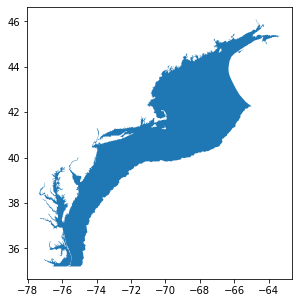

In [4]:
nes = gpd.read_file("/D/MIT-WHOI/data/2021/lme/lme.shp")
fig,ax = plt.subplots(figsize = (5,5))
nes.plot(ax = ax)
nes.info()

In [28]:
geometry = [Point(xy) for xy in zip(ec_data["lon"],ec_data["lat"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(ec_data,crs =crs,geometry =geometry)

geo_df[geo_df.lat == 40].head()

# print("Abiotic Variables: ",list(geo_df)[1:14])
# print("Biotic Variables: ",list(geo_df)[14:])

,cruise_name,station,zoo_gear,ich_gear,lat,lon,date,time,depth,sfc_temp,...,parden_100m3,pseame_100m3,hippla_100m3,limfer_100m3,glycyn_100m3,scoaqu_100m3,sypspp_100m3,lopame_100m3,year,geometry
209,AL0002,113,6B3Z,6B3I,40.0,-73.8833,2000-03-27,06:10:00,25,5.86,...,0.0,4.14,0.0,2.07,0.0,0.00,0.0,0.00,2000,POINT (-73.88330 40.00000)
1131,AL0111,43,6B3Z,6B3I,40.0,-71.2350,2001-11-03,16:11:00,259,16.30,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,2001,POINT (-71.23500 40.00000)
5675,AL8302,221,6B3,6B5,40.0,-70.4000,1983-04-02,19:27:00,255,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,1983,POINT (-70.40000 40.00000)
6179,AL8402,210,6B3,6B5,40.0,-71.3000,1984-03-23,08:30:00,205,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,1984,POINT (-71.30000 40.00000)
6592,AL8407,22,6B3,6B5,40.0,-73.7333,1984-07-26,00:33:00,34,NaN,...,0.0,0.00,0.0,0.00,0.0,2.18,0.0,2.18,1984,POINT (-73.73330 40.00000)


In [18]:
#Contextily Providers
ctx.providers.keys()
# ctx.providers.Esri.keys()
# ctx.providers.OpenSeaMap.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

Text(111.375, 0.5, 'Latitude')

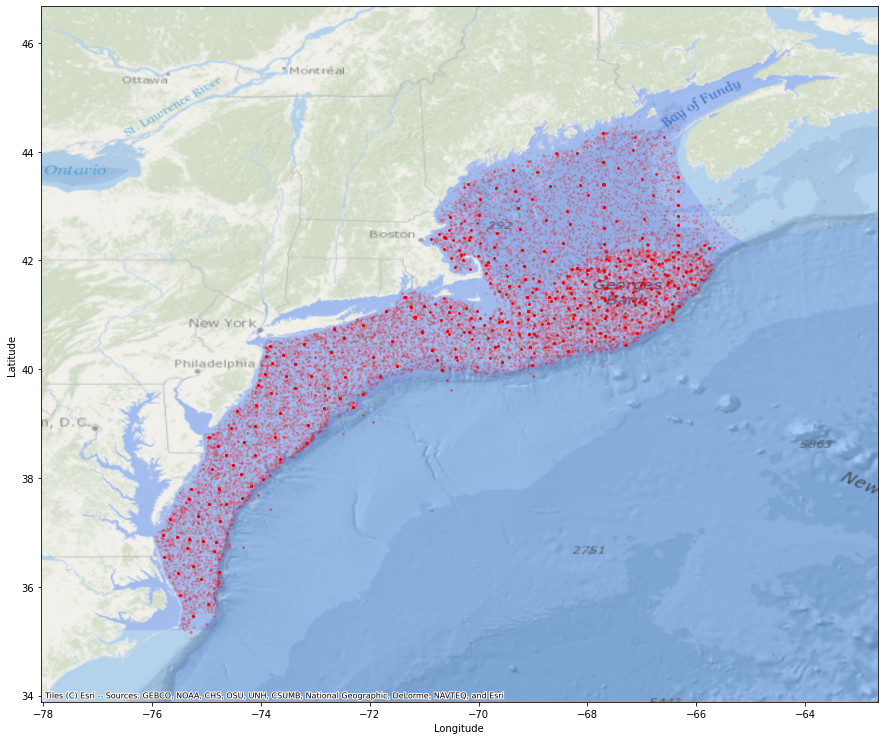

In [30]:


fig,ax = plt.subplots(figsize = (15,15))
nes.plot(ax = ax, alpha = 0.1, color = "blue")
ax = geo_df.plot(ax=ax, markersize = 2, alpha = 0.1,c = "red", marker = "o",label = "s")
ctx.add_basemap(ax,crs= geo_df.crs.to_string(),source = ctx.providers.Esri.OceanBasemap)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### Isolating Calanus Finmarchicus

Text(111.375, 0.5, 'Latitude')

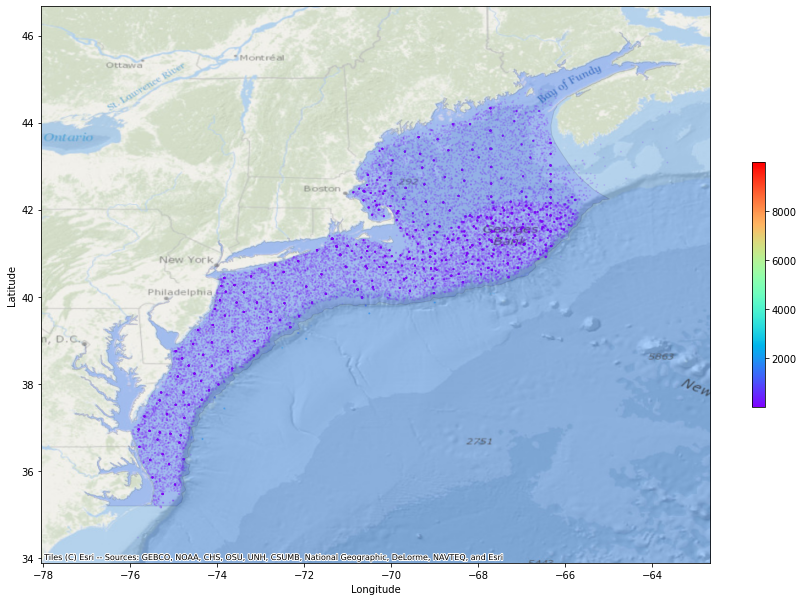

In [19]:
fig,ax = plt.subplots(figsize = (15,15))
nes.plot(ax = ax, alpha = 0.1, color = "blue",edgecolor = "k")
ax = geo_df.plot(column = 'depth',ax=ax,alpha = 0.1,
                 markersize = 1,
#                  c = geo_df["calfin_10m2"], 
                 marker = "o",label = "s",
                 cmap = "rainbow",
                 legend = True,
                legend_kwds = {'shrink':0.3})
ctx.add_basemap(ax,crs= geo_df.crs.to_string(),source = ctx.providers.Esri.OceanBasemap)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

aggregate by isobath and latitude? or latitude and bottom depth